## Multiple Regression On 2016 U.S. Election

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [6]:
# Load and merge datasets: us-elections-2016.csv and county-data.csv.
elections = pd.read_csv("us-elections-2016.csv.bz2", sep='\t')
county = pd.read_csv("county-data.csv.bz2")

new = [];
for i in county['COUNTY']:
    if i < 10:
        new.append(('00' + str(i)))
    elif i < 100:
        new.append(('0' + str(i)))
    else:
        new.append(str(i))
df_new = pd.DataFrame(new)
county['county_zips'] = df_new
county['fips_code'] = county['STATE'].apply(str) + county['county_zips']
county['fips_code'] = county['fips_code'].astype(np.int64)
county = county.drop(['county_zips'], axis=1)

df = pd.merge(elections, county, on='fips_code')
df

,fips_code,county,total_2008,dem_2008,gop_2008,oth_2008,total_2012,dem_2012,gop_2012,oth_2012,...,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016
0,26041,Delta County,19064,9974,8763,327,18043,8330,9533,180,...,-0.434381,-5.939812,-2.822691,-3.966450,-0.972960,-0.867526,-0.271488,-5.776331,-2.658263,-3.801182
1,48295,Lipscomb County,1256,155,1093,8,1168,119,1044,5,...,6.915430,13.070038,-9.566685,-29.545455,7.240911,31.167304,7.779859,14.490695,-7.878447,-27.840909
2,1127,Walker County,28652,7420,20722,510,28497,6551,21633,313,...,-0.908093,-3.391687,-3.133239,-2.763746,-3.920190,-3.778072,-0.484316,-2.874568,-2.598296,-2.226351
3,48389,Reeves County,3077,1606,1445,26,2867,1649,1185,33,...,7.486364,10.436001,12.868780,-3.231235,-8.770658,6.281135,11.407793,14.988618,17.523444,1.548300
4,56017,Hot Springs County,2546,619,1834,93,2495,523,1894,78,...,2.065476,-4.358203,-6.497590,-9.974533,5.398671,5.588905,2.065476,-4.358203,-6.497590,-9.974533
5,20043,Doniphan County,3564,1115,2372,77,3369,885,2397,87,...,-4.200344,-1.530905,-8.724100,-11.932555,-2.264293,-10.366625,-3.563928,-0.637877,-7.826031,-11.024643
6,37183,Wake County,442245,250891,187001,4353,526805,286939,232933,6933,...,10.767224,12.060957,11.716590,12.607522,15.214385,16.179610,14.338994,15.989313,15.739619,16.462962
7,37147,Pitt County,74884,40501,33927,456,76814,40701,35534,579,...,1.169203,-2.678594,-0.176494,-0.141482,5.977955,6.797238,2.539993,-1.053123,1.463191,1.454434
8,48497,Wise County,20639,4471,15973,195,20692,3219,17178,295,...,5.056120,6.468853,12.364214,20.755592,8.733698,3.804271,5.319631,6.876212,12.894109,21.274089
9,21207,Russell County,7475,1569,5779,127,7907,1445,6346,116,...,8.160721,4.902099,-6.100661,5.486736,7.606289,-6.526304,8.670766,5.578250,-5.309834,6.278636


In [7]:
# Conduct a consistency check: how many states do I have? Is there anything missing? Is a non-state included?
num_states = df['state'].nunique()
unique_states = df['state'].unique()
missing_states = df['state'].isna().sum()
print("Number of States:", num_states)
print("Unique States:", unique_states)
print("Missing states:", missing_states)

Number of States: 50
Unique States: ['Michigan' 'Texas' 'Alabama' 'Wyoming' 'Kansas' 'North Carolina'
 'Kentucky' 'Arkansas' 'Nebraska' 'Tennessee' 'New York' 'Pennsylvania'
 'Mississippi' 'Louisiana' 'Oklahoma' 'Virginia' 'Maine' 'Missouri'
 'Florida' 'Indiana' 'Ohio' 'New Jersey' 'Montana' 'South Dakota' 'Iowa'
 'Illinois' 'South Carolina' 'Georgia' 'New Mexico' 'Utah' 'Minnesota'
 'North Dakota' 'Vermont' 'California' 'Wisconsin' 'Oregon' 'Hawaii'
 'West Virginia' 'Rhode Island' 'Massachusetts' 'Maryland' 'Nevada'
 'Connecticut' 'Colorado' 'Washington' 'Idaho' 'Arizona' 'New Hampshire'
 'Delaware' 'District of Columbia']
Missing states: 0


I have 50 states inside my dataframe with no missing values. I've checked for the unique states in my dataset and there is no missings and non-states are not included. Since there is a `state` and `STNAME` inside the merged dataframe as a result of the elections and county dataset both having their respective state variables, I conducted the consistency check with both variables and yielded the same results.

In [8]:
# Compute the percentage of votes for democrats in 2016. Do consistency checks (minimum, maximum, mean, and missings).
democrat_votes = df['dem_2016'].sum()
total_votes = df['total_2016'].sum()
percentage_democrats = (democrat_votes / total_votes) * 100
df['percentage_democrats'] = (df['dem_2016'] / df['total_2016']) * 100

# Consistency Checks
print("Percentage of votes for Democrats in 2016:", percentage_democrats)
print("Democratic votes: Min:", df['percentage_democrats'].min(), "Max:", df['percentage_democrats'].max(), "Mean:", df['percentage_democrats'].mean(),\
     "Missings:", df['percentage_democrats'].isna().sum())

Percentage of votes for Democrats in 2016: 47.8299277521187
Democratic votes: Min: 3.1446540880503147 Max: 92.84659188217161 Mean: 31.6930677211332 Missings: 0


The minimum and maximum allow us to check for extreme values and the counties where a majority of the population either voted for democrats or another political party. This information is useful for political candidates to scan demographics and see who their target audience is. Candidates will try to gain as many votes as possible and may go to certain counties to garner more support. 

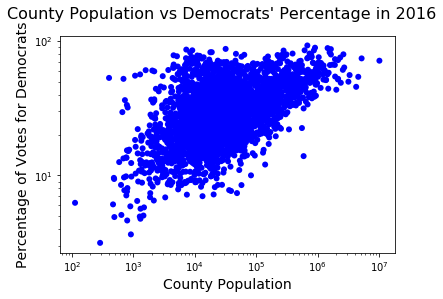

In [9]:
# Visualize the relationship between democrats' percentage and county population. A
fig = plt.figure()
ax = plt.gca()
ax.scatter(df['POPESTIMATE2016'], df['percentage_democrats'], c='blue', edgecolors='none')
fig.suptitle("County Population vs Democrats' Percentage in 2016", fontsize=16)
plt.xlabel('County Population', fontsize=14)
plt.ylabel('Percentage of Votes for Democrats', fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')

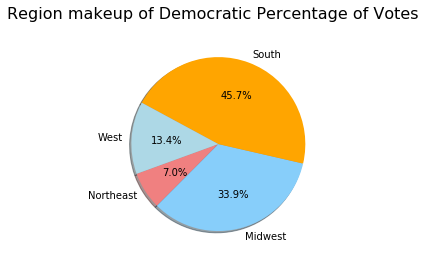

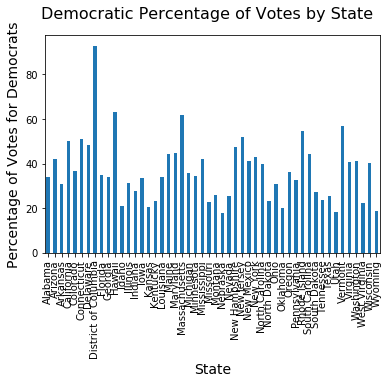

In [10]:
# Other variables that may be related to the vote percentage
pie_chart = df.groupby(['REGION'])['percentage_democrats'].size()
labels = ['Northeast', 'Midwest', 'South', 'West']
explode = (0, 0, 0, 0)
colors = ['lightcoral', 'lightskyblue', 'orange', 'lightblue']

pie = plt.pie(pie_chart, explode = explode, labels = labels, colors = colors, autopct='%1.1f%%', shadow=True, startangle=200)
plt.suptitle("Region makeup of Democratic Percentage of Votes", fontsize=16)
plt.show()

graph = df.groupby(['state'])['percentage_democrats'].mean()
graphical_plot = graph.plot(kind = 'bar', x = 'state', y = 'graph')
plt.suptitle("Democratic Percentage of Votes by State", fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Percentage of Votes for Democrats', fontsize=14)
plt.show()

First, I chose to analyze how the regional makeup for the U.S. - Northeast, Midwest, South, and West - affect the the percentage of votes cast for Democrats. I presented my analysis through a pie chart showing the percentage of Democratic votes did each region contribute. For my second variable, I analyzed the percentage of votes for democrats for each state. I grouped by all the states in the dataset, and then found the mean democratic percentage from all the data points, resulting in the bar chart graph.

In [11]:
# Estimate a simple regression model of democrats' percentage by the county population
m = smf.ols(formula='percentage_democrats ~ POPESTIMATE2016', data=df).fit()
print(m.summary())

                             OLS Regression Results                             
Dep. Variable:     percentage_democrats   R-squared:                       0.122
Model:                              OLS   Adj. R-squared:                  0.122
Method:                   Least Squares   F-statistic:                     433.4
Date:                  Mon, 09 Dec 2019   Prob (F-statistic):           3.16e-90
Time:                          20:04:37   Log-Likelihood:                -12703.
No. Observations:                  3111   AIC:                         2.541e+04
Df Residuals:                      3109   BIC:                         2.542e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          30.

`percentage_democrats` is the percentage of the population of the respective county that is democrats, which we will then use the regression model to calculate that using the other descriptors inside the dataframe. For an increase in one unit of `POPESTIMATE2016` (resident total population estimate), the `percentage_democrats` increases by 1.616e-07 times the number of `POPESTIMATE2016`. The intercept is the expected mean value of y when all the predictors are zero, which yields a coefficient of 30.0186. This means that at a `POPESTIMATE2016` of 0, we have a base percentage_democrats of 30.0186. `POPESTIMATE2016` is statistically significant at the 5% confidence interval with a P-value of under 0.005.

In [12]:
# Re-estimate the model, but using log(population) as my explanatory instead of using population
df['log_popestimate2016'] = np.log(df['POPESTIMATE2016'])
m = smf.ols(formula='percentage_democrats ~ log_popestimate2016', data=df).fit()
print(m.summary())

                             OLS Regression Results                             
Dep. Variable:     percentage_democrats   R-squared:                       0.251
Model:                              OLS   Adj. R-squared:                  0.250
Method:                   Least Squares   F-statistic:                     1040.
Date:                  Mon, 09 Dec 2019   Prob (F-statistic):          4.59e-197
Time:                          20:04:37   Log-Likelihood:                -12457.
No. Observations:                  3111   AIC:                         2.492e+04
Df Residuals:                      3109   BIC:                         2.493e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept     

In [13]:
# Compare the two models. Which one do I prefer?

The model that utilizes log(population) yielded an R-squared value of 0.251, which is about doubled the old R-squared value. The coefficient also resulted in a higher coefficient and standard error, which means a higher t-value and lower p-value. While situational, I prefer the logarathimic model in this situation because taking the log of the explanatory variable makes the datset fit more normally distributed when there are skewed values. The results of the model especially the higher t-value indicates a greater evidence against the null hypothesis, and a greater evidence about the coefficient being statistically significant.

In [14]:
# Now estimate a multiple regression model. I include all the variables that I think are relevant in
# explaining the democrats' share. 
m = smf.ols(formula='percentage_democrats ~ log_popestimate2016 + REGION + state + RINTERNATIONALMIG2016 + RDOMESTICMIG2016 + GQESTIMATES2016', data=df).fit()
print(m.summary())

                             OLS Regression Results                             
Dep. Variable:     percentage_democrats   R-squared:                       0.509
Model:                              OLS   Adj. R-squared:                  0.501
Method:                   Least Squares   F-statistic:                     59.85
Date:                  Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                          20:04:37   Log-Likelihood:                -11799.
No. Observations:                  3111   AIC:                         2.371e+04
Df Residuals:                      3057   BIC:                         2.403e+04
Df Model:                            53                                         
Covariance Type:              nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

I chose to analyze `log_popestimate2016` because I found the scatterplot to explain the democrats' share well and so it's dataset would likely be useful inside the regression model. Its coefficient was found to be 0.0282 after I logged `POPESTIMATE2016` to yield a more accurate result, which is one of the best predictors within my explanatory variables. `state` was a very good predictor as it contains 50 states which increases the predictor's accuracy by conducting more tests. Its coefficient values are spread out with some states being better predictors like one another. I originally thought `REGION` would be good indicator after conducting the pie chart that displayed how demographics affected how people voted for the Democratic party, but it turned out average resulting in a -0.0105 coefficient. `RDOMESTICMIG2016` yielded a similar coefficient value as `REGION` with -0.0011, which shows the death rate from period 7/1/2015 to 6/30/2016 being an average predictor as well. `RINTERNATIONALMIG2016`, which shows the net international migration rate from period 7/1/2015 to 6/30/2016 and `GQESTIMATES2016`, which shows the 7/1/2016 group quarters total population estimate, proved to be a better predictor by resulting in positive numbers with 0.0216 and 2.383e-06, respectively. These variables show how the demographic change makeup from year to year leading up to the election year plays an important part in predicting how certain populations vote for the demogratic party over time.